# SAM - Segment Anything Model by Meta

In [1]:
!git clone https://github.com/facebookresearch/segment-anything #clone SAM repo
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
%cd segment-anything

Cloning into 'segment-anything'...
remote: Enumerating objects: 295, done.
remote: Total 295 (delta 0), reused 0 (delta 0), pack-reused 295
Receiving objects: 100% (295/295), 18.31 MiB | 31.62 MiB/s, done.
Resolving deltas: 100% (156/156), done.
--2023-07-04 11:01:05--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.224.2.88, 13.224.2.21, 13.224.2.42, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.224.2.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   240MB/s    in 14s     

2023-07-04 11:01:19 (177 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]

/content/segment-anything


In [2]:
!git clone https://github.com/roboflow/supervision

Cloning into 'supervision'...
remote: Enumerating objects: 2096, done.
remote: Counting objects: 100% (571/571), done.
remote: Compressing objects: 100% (304/304), done.
remote: Total 2096 (delta 360), reused 303 (delta 262), pack-reused 1525
Receiving objects: 100% (2096/2096), 3.61 MiB | 12.89 MiB/s, done.
Resolving deltas: 100% (1328/1328), done.


In [3]:
import torch
import torchvision
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import supervision as sv

In [4]:
import zipfile # zip and unzip

local_zip = '/content/Interior.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Interior')
zip_ref.close()

In [5]:
# Directory with rose
int_dir = os.path.join('Interior/Interior')
int_dir

'Interior/Interior'

In [6]:
IMAGE_PATH = os.listdir(int_dir)
IMAGE_PATH

['home-renovation-singapore-interior-design-tips-900x643.png',
 'INTERIOR-DECORATOR.jpg',
 'Arch2O-what-you-need-to-know-before-becoming-an-interior-designer-2.jpg',
 'photo-1615529182904-14819c35db37.jpg',
 'Best-Interior-Design-Ideas-Upcoming-Trending-Interior-Design-for-2023.jpg',
 'Minimalist-interior-design-Tips-to-make-your-home-look-minimal.jpg',
 'GettyImages-1161177015-f1de4ba58a6c4f50969d9119d80405a6.jpg',
 'living-room-by-interior-designers-1-1040x675.jpg']

In [7]:
len(IMAGE_PATH)

8

In [8]:
temp=[]
for i in IMAGE_PATH:
  test=int_dir+"/"+i
  temp.append(test)

temp
#!mkdir images
#!wget -O images/image.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGY56nx1rzKFmlwvuCA1m0buj22-kaBsiYsw&usqp=CAU

['Interior/Interior/home-renovation-singapore-interior-design-tips-900x643.png',
 'Interior/Interior/INTERIOR-DECORATOR.jpg',
 'Interior/Interior/Arch2O-what-you-need-to-know-before-becoming-an-interior-designer-2.jpg',
 'Interior/Interior/photo-1615529182904-14819c35db37.jpg',
 'Interior/Interior/Best-Interior-Design-Ideas-Upcoming-Trending-Interior-Design-for-2023.jpg',
 'Interior/Interior/Minimalist-interior-design-Tips-to-make-your-home-look-minimal.jpg',
 'Interior/Interior/GettyImages-1161177015-f1de4ba58a6c4f50969d9119d80405a6.jpg',
 'Interior/Interior/living-room-by-interior-designers-1-1040x675.jpg']

In [9]:
#plot annotation
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [10]:
len(temp)

8

In [11]:
image_path=[]
for i in temp:
  img_path = cv2.imread(i)
  img_path = cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)
  image_path.append(img_path)
  #print(image_path)
len(image_path)

8

In [12]:
image_path

[array([[[197, 181, 155],
         [197, 181, 155],
         [197, 181, 155],
         ...,
         [209, 173, 132],
         [209, 173, 132],
         [209, 173, 132]],
 
        [[197, 181, 155],
         [200, 183, 161],
         [197, 181, 155],
         ...,
         [209, 173, 132],
         [209, 173, 132],
         [209, 173, 132]],
 
        [[197, 181, 155],
         [197, 181, 155],
         [197, 181, 155],
         ...,
         [209, 173, 132],
         [209, 173, 132],
         [206, 169, 127]],
 
        ...,
 
        [[206, 201, 184],
         [202, 197, 180],
         [193, 181, 159],
         ...,
         [215, 199, 180],
         [227, 218, 208],
         [206, 201, 184]],
 
        [[168, 149, 127],
         [200, 183, 161],
         [190, 176, 156],
         ...,
         [227, 218, 208],
         [233, 223, 210],
         [227, 218, 208]],
 
        [[181, 165, 141],
         [157, 141, 116],
         [148, 127, 104],
         ...,
         [242, 235, 221],
  

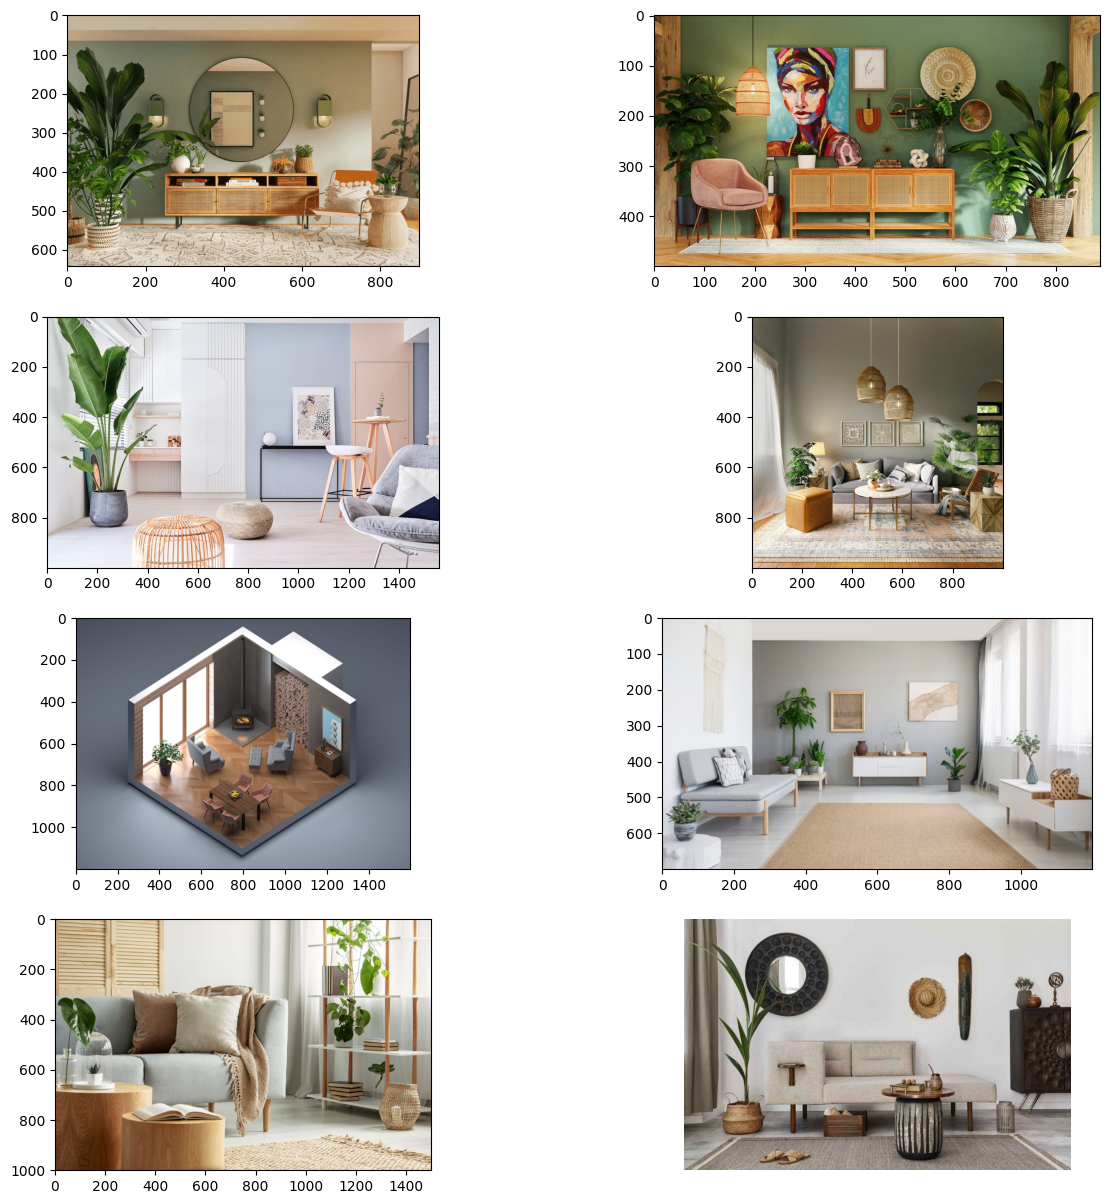

In [13]:
plt.figure(figsize=(15,15)) # specifying the overall grid size

for i in range(8):
    plt.subplot(4,2,i+1)    # the number of images in the grid is 2*4 (8)
    plt.imshow(image_path[i])
plt.axis('off')
plt.show()

In [14]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "/content/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [15]:
masks = mask_generator.generate(image_path[0])

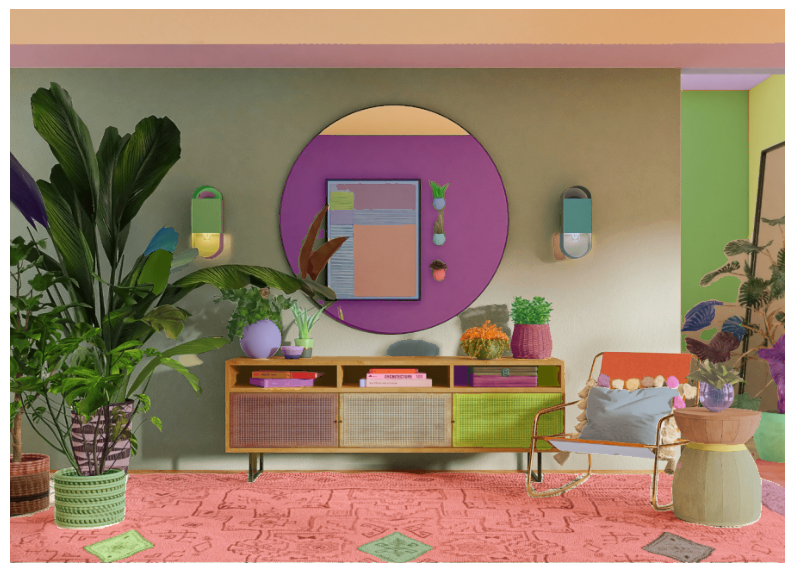

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(image_path[0])
show_anns(masks)
plt.axis('off')
plt.show()

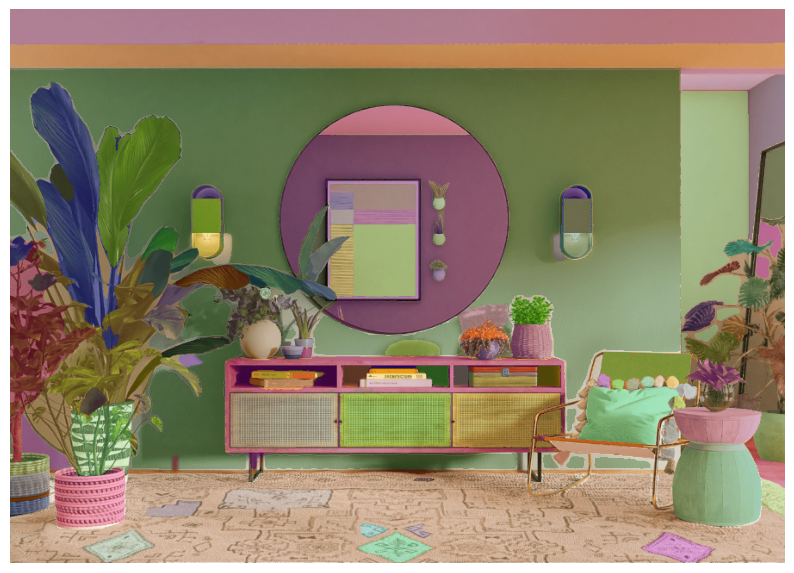

In [17]:
mask_generator_2 = SamAutomaticMaskGenerator(
model=sam,
points_per_side=32,
pred_iou_thresh=0.86,
stability_score_thresh=0.92,
crop_n_layers=1,
crop_n_points_downscale_factor=2,
min_mask_region_area=100, # Requires open-cv to run post-processing
)
masks2 = mask_generator_2.generate(image_path[0])
plt.figure(figsize=(10,10))
plt.imshow(image_path[0])
show_anns(masks2)
plt.axis('off')
plt.show()

In [18]:
masks_list=[]
for i in range(8):
  mask_lt = mask_generator.generate(image_path[i])
  masks_list.append(mask_lt)
  #print(masks_list)
len(masks_list)

8

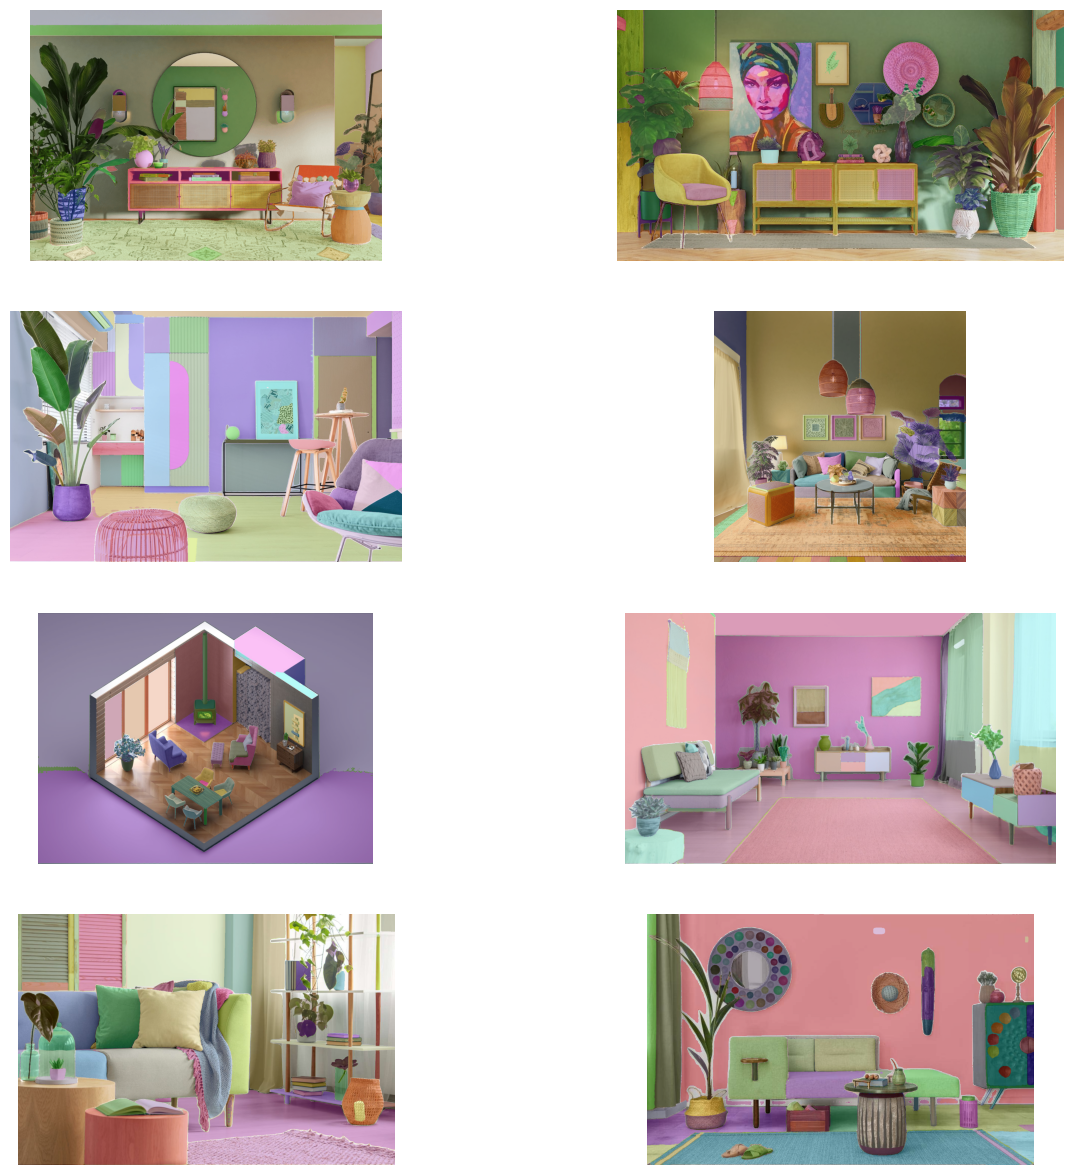

In [19]:
plt.figure(figsize=(15,15)) # specifying the overall grid size

for i in range(8):
    plt.subplot(4,2,i+1)    # the number of images in the grid is 2*4 (8)
    plt.imshow(image_path[i])
    show_anns(masks_list[i])
    plt.axis('off')
plt.show()